<a href="https://colab.research.google.com/github/nhutHao02/ML_Lab/blob/main/Project_Laptops_csv_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Lab'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_Lab


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB, ComplementNB
from prettytable import PrettyTable
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
laptops = pd.read_csv('laptops.csv')
laptops.head(5)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


<Axes: >

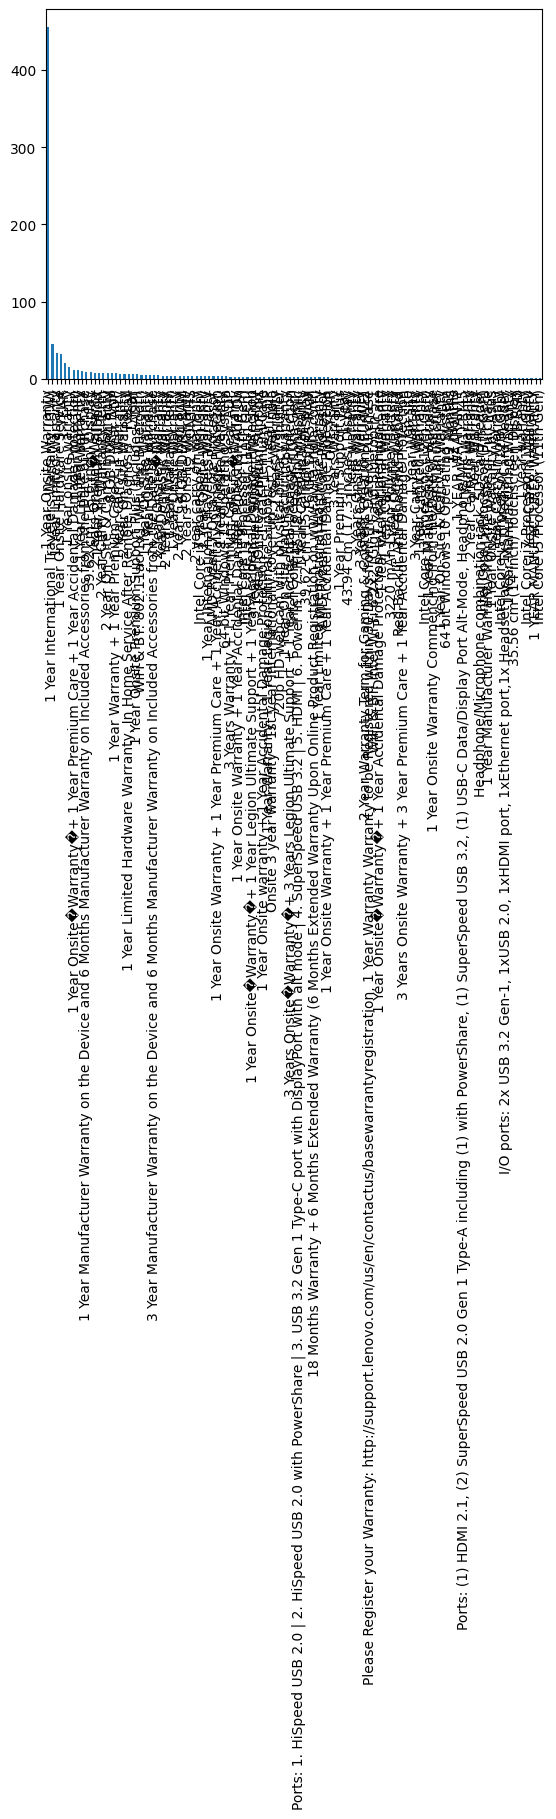

In [ ]:
laptops.warranty.value_counts().plot(kind='bar')

In [ ]:
laptops.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB


In [ ]:
#Kiểm tra giá trị nào thiếu trong dataset
print(laptops.isnull().sum())

Unnamed: 0       0
title            0
price            0
discount        89
Processor        0
RAM              0
OS               0
SSD              0
Display          0
In_build_sw    563
warranty        14
dtype: int64


In [ ]:
laptops.In_build_sw = laptops.In_build_sw.fillna('No')
laptops.In_build_sw = np.where(laptops.In_build_sw == 'No', 0, 1)

In [ ]:
# laptops.warranty.unique()

In [ ]:
#
laptops.warranty = np.where(laptops.warranty.str.contains('Year') == False, 'No',laptops.warranty.str.split(' ').str[0])
laptops.warranty = np.where(~laptops.warranty.isin(['1','2','3']), 'No',laptops.warranty.str.split(' ').str[0])
laptops.warranty = pd.to_numeric(laptops.warranty, errors='coerce')
laptops.warranty = laptops.warranty.fillna(0)
# laptops.warranty.unique()


In [ ]:
#Kiểm tra giá trị nào thiếu trong dataset
print(laptops.isnull().sum())

Unnamed: 0      0
title           0
price           0
discount       89
Processor       0
RAM             0
OS              0
SSD             0
Display         0
In_build_sw     0
warranty        0
dtype: int64


In [ ]:
# create Ram_sizes and Ram_Types
laptops.RAM = np.where(laptops.RAM.str.contains('RAM & Storage') == False, laptops.RAM,laptops.RAM.str.replace('GB',' GB'))
laptops.RAM = laptops.RAM.str.replace('RAM & Storage: ','')

laptops['Ram_Sizes'] = laptops.RAM.str.split(' ').str[0]
laptops.loc[~(laptops.Ram_Sizes.isin(['4','8','16','32'])),['Ram_Sizes']] = '0'
laptops['Ram_Types'] = laptops.RAM.str.split(' ').str[2]
laptops.loc[~(laptops.Ram_Types.isin(['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X', 'LPDDR5'])),['Ram_Types']] = 'Not specified' #Replace value not in Ram_Types

In [ ]:
# convert price to int
laptops.price = laptops.price.str.replace('₹','').str.replace(',','').astype(float)


In [ ]:
#create Laptop_Brands
laptops['Laptop_Brands'] = laptops.title.str.split(' ').str[0]
laptops.loc[~(laptops.Laptop_Brands.isin(['ASUS','HP','DELL','Lenovo','acer','MSI','Apple','Infinix'])),['Laptop_Brands']] = 'Not specified' #Replace value not in Processor Brands
#create Processor_Brands
laptops.Processor	 = laptops.Processor	.str.replace('Processor: ','') # Delete value contain 'Processor:' 
laptops['Processor_Brands'] = laptops.Processor.str.split(' ').str[0]
laptops.loc[~(laptops.Processor_Brands.isin(['Intel','AMD','Apple','NVIDIA'])),['Processor_Brands']] = 'Not specified' #Replace value not in Processor Brands
laptops.shape

(920, 15)

In [ ]:
#create SSD_Size
laptops['SSD_Sizes'] = laptops.SSD.str.split(' ').str[0]
laptops.loc[~(laptops.SSD_Sizes.isin(['512','256','128','1','2','4'])),['SSD_Sizes']] = '0'
laptops.SSD_Sizes = np.where(laptops.SSD_Sizes.astype(int) < 10 , laptops.SSD_Sizes.astype(int)*1024,laptops.SSD_Sizes.astype(int))

In [ ]:
laptops.drop("Unnamed: 0",axis=1,inplace=True) 
laptops.drop("discount",axis=1,inplace=True) 
laptops.drop("Processor",axis=1,inplace=True) 
laptops.drop("RAM",axis=1,inplace=True) 
laptops.drop("SSD",axis=1,inplace=True) 


In [ ]:
laptops.head(5)

,title,price,OS,Display,In_build_sw,warranty,Ram_Sizes,Ram_Types,Laptop_Brands,Processor_Brands,SSD_Sizes
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990.0,Graphics & Keyboard: Integrated & Standard Key...,Intel Core i3 Processor (11th Gen),0,0.0,8,DDR4,DELL,Intel,0
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,64 bit Windows 11 Operating System,35.56 cm (14 inch) Display,0,1.0,8,DDR4,HP,Intel,256
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,1.0,8,DDR4,Lenovo,Intel,512
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,1,1.0,8,DDR4,HP,Intel,512
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,1,1.0,8,DDR4,ASUS,Intel,512


In [ ]:
laptops.Laptop_Brands.value_counts()

ASUS             263
HP               165
DELL             162
Lenovo           108
Not specified     79
acer              62
MSI               50
Infinix           31
Name: Laptop_Brands, dtype: int64

In [ ]:
laptops.In_build_sw.astype(int)
laptops.warranty.astype(int)
laptops.Ram_Sizes.astype(int)
laptops.SSD_Sizes.astype(int)

label_encoder = LabelEncoder()
laptops.Ram_Types = label_encoder.fit_transform(laptops.Ram_Types)
laptops.Processor_Brands = label_encoder.fit_transform(laptops.Processor_Brands)
laptops.Laptop_Brands = label_encoder.fit_transform(laptops.Laptop_Brands)


<Axes: >

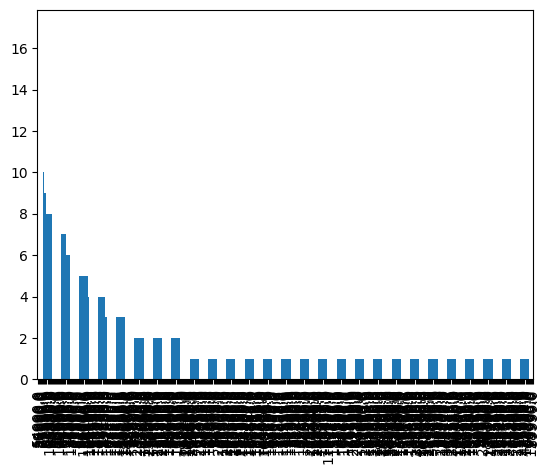

In [ ]:
laptops.price.value_counts().plot(kind='bar')

In [ ]:
X = laptops[['In_build_sw', 'warranty', 'Ram_Sizes','SSD_Sizes','Ram_Types','Processor_Brands']]
y = laptops['Laptop_Brands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.value_counts())
# print(y_train.value_counts())
# Oversampling with RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# Undersampling with RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Hybrid approach with SMOTEENN
# smote_enn = SMOTE(random_state=42)
# X_train, y_train = smote_enn.fit_resample(X_train, y_train)
# Apply feature selection
# selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
# X_train_new = selector.fit_transform(X_train, y_train)
# X_test_new = selector.transform(X_test)
# TABLE SO SÁNH
# print(X_train.value_counts())
# print(y_train.value_counts())
results_table = PrettyTable()
results_table.field_names = ["Classifier", "Accuracy", "Precision","Recall","F1 Score"]

In [ ]:
# Neural network
# Chuẩn hóa các feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Chuyển biến mục tiêu thành phân loại
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# tạo neural network model
def create_dnn_model():
  clf = Sequential()
  clf.add(Dense(250, activation='relu', input_shape=(X_train.shape[1],)))
  clf.add(Dense(100, activation='relu'))
  clf.add(Dense(y_train.shape[1], activation='softmax'))
  clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return clf
#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)
     

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [5, 10, 15]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}


grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid_model.fit(X_train, y_train)



Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9266 - accuracy: 0.2840
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7137 - accuracy: 0.3946
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6002 - accuracy: 0.4167
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5336 - accuracy: 0.4422
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9320 - accuracy: 0.2428
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7429 - accuracy: 0.3192
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6247 - accuracy: 0.3905
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5541 - accuracy: 0.4007
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9708 - accuracy: 0.2360
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7446 - accuracy: 0.3413
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6244 - accuracy: 0.3888
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5458 - accuracy: 0.4295
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9455 - accuracy: 0.2784
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7427 - accuracy: 0.3413
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6332 - accuracy: 0.3854
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5563 - accuracy: 0.4092
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.8918 - accuracy: 0.3158
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 1.6916 - accuracy: 0.3803
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 1.5817 - accuracy: 0.4092
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 1.5160 - accuracy: 0.4075
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9037 - accuracy: 0.2755
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.6928 - accuracy: 0.3810
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 1.5872 - accuracy: 0.4099
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 1.5286 - accuracy: 0.4371
Epoch 5/5
5/5 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9814 - accuracy: 0.2377
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7544 - accuracy: 0.3718
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6349 - accuracy: 0.3769
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 1.5671 - accuracy: 0.4024
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9477 - accuracy: 0.2716
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7330 - accuracy: 0.3565
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 1.6150 - accuracy: 0.3854
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5484 - accuracy: 0.4228
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.8795 - accuracy: 0.3226
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6654 - accuracy: 0.3871
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5798 - accuracy: 0.3990
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5254 - accuracy: 0.4211
Epoch 5/5
5/5 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9193 - accuracy: 0.2920
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7112 - accuracy: 0.3582
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6021 - accuracy: 0.4160
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5354 - accuracy: 0.4211
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9357 - accuracy: 0.3010
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7035 - accuracy: 0.3895
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5973 - accuracy: 0.4184
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5267 - accuracy: 0.4473
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9327 - accuracy: 0.2920
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7289 - accuracy: 0.3599
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6163 - accuracy: 0.3973
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5601 - accuracy: 0.4092
Epoch 5/5
5/5 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9874 - accuracy: 0.2496
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7614 - accuracy: 0.3548
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 1.6316 - accuracy: 0.3871
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 1.5567 - accuracy: 0.3888
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 3s 4ms/step - loss: 1.9548 - accuracy: 0.2801
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.7303 - accuracy: 0.3514
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 1.6227 - accuracy: 0.4058
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 1.5540 - accuracy: 0.4007
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9237 - accuracy: 0.2564
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 1.6900 - accuracy: 0.3684
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 1.5947 - accuracy: 0.3922
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 1.5302 - accuracy: 0.4109
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9430 - accuracy: 0.2653
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7293 - accuracy: 0.3690
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6131 - accuracy: 0.3878
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5475 - accuracy: 0.4167
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5021 - accuracy: 0.4269
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4646 - accuracy: 0.4439
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4418 - accuracy: 0.4694
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4203 - accuracy: 0.4558
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4005 - accuracy: 0.4864
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9207 - accuracy: 0.2818
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7071 - accuracy: 0.3718
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6050 - accuracy: 0.3990
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5498 - accuracy: 0.4075
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5156 - accuracy: 0.4448
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4782 - accuracy: 0.4380
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4590 - accuracy: 0.4465
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4400 - accuracy: 0.4465
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4243 - accuracy: 0.4346
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9504 - accuracy: 0.2479
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7196 - accuracy: 0.3667
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6027 - accuracy: 0.3956
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5372 - accuracy: 0.4228
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4954 - accuracy: 0.4465
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4597 - accuracy: 0.4448
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4409 - accuracy: 0.4584
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4241 - accuracy: 0.4601
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4006 - accuracy: 0.4669
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9038 - accuracy: 0.3090
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6833 - accuracy: 0.3803
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5879 - accuracy: 0.4024
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5331 - accuracy: 0.4109
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4935 - accuracy: 0.4194
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4634 - accuracy: 0.4448
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4416 - accuracy: 0.4533
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4176 - accuracy: 0.4618
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4011 - accuracy: 0.4788
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9209 - accuracy: 0.2649 
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6994 - accuracy: 0.3820
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6035 - accuracy: 0.3973
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5428 - accuracy: 0.4024
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5040 - accuracy: 0.4109
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4668 - accuracy: 0.4312
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4474 - accuracy: 0.4143
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4157 - accuracy: 0.4567
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 1.3975 - accuracy: 0.4652
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9424 - accuracy: 0.2568
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.7057 - accuracy: 0.3588
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6152 - accuracy: 0.3912
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5384 - accuracy: 0.4252
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4970 - accuracy: 0.4592
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4657 - accuracy: 0.4626
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4356 - accuracy: 0.4626
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4141 - accuracy: 0.4830
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.3966 - accuracy: 0.4779
Epoch 10/10
5/5 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9314 - accuracy: 0.2801
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.7308 - accuracy: 0.3396
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6207 - accuracy: 0.3820
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 1.5586 - accuracy: 0.4143
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 1.5135 - accuracy: 0.4211
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4800 - accuracy: 0.4465
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4596 - accuracy: 0.4550
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4451 - accuracy: 0.4703
Epoch 9/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4220 - accuracy: 0.4686
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9666 - accuracy: 0.2666
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7377 - accuracy: 0.3447
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6039 - accuracy: 0.4058
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5274 - accuracy: 0.4211
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4820 - accuracy: 0.4533
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4539 - accuracy: 0.4431
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4228 - accuracy: 0.4720
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4078 - accuracy: 0.4669
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.3882 - accuracy: 0.4754
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9437 - accuracy: 0.2801 
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7327 - accuracy: 0.3379
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6228 - accuracy: 0.3803
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5551 - accuracy: 0.4160
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5161 - accuracy: 0.4261
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4771 - accuracy: 0.4160
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4521 - accuracy: 0.4414
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4282 - accuracy: 0.4516
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4121 - accuracy: 0.4567
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9242 - accuracy: 0.3141
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.7041 - accuracy: 0.3752
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6038 - accuracy: 0.3939
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5402 - accuracy: 0.4075
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4987 - accuracy: 0.4228
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4645 - accuracy: 0.4278
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4369 - accuracy: 0.4448
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4163 - accuracy: 0.4618
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 1.3946 - accuracy: 0.4567
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9354 - accuracy: 0.2670
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7131 - accuracy: 0.3810
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6035 - accuracy: 0.3929
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5443 - accuracy: 0.4133
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5013 - accuracy: 0.4592
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4665 - accuracy: 0.4626
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4407 - accuracy: 0.4779
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4276 - accuracy: 0.4575
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4078 - accuracy: 0.4762
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9597 - accuracy: 0.2683
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7316 - accuracy: 0.3616
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6252 - accuracy: 0.3854
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5675 - accuracy: 0.3990
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5203 - accuracy: 0.4007
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4936 - accuracy: 0.4329
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4714 - accuracy: 0.4414
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4483 - accuracy: 0.4533
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4291 - accuracy: 0.4482
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9561 - accuracy: 0.2428 
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.7440 - accuracy: 0.3633
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.6339 - accuracy: 0.4041
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5699 - accuracy: 0.4092
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5172 - accuracy: 0.4414
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4812 - accuracy: 0.4499
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4544 - accuracy: 0.4635
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4366 - accuracy: 0.4414
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 1.4169 - accuracy: 0.4703
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9102 - accuracy: 0.2869
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.6935 - accuracy: 0.3463
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5999 - accuracy: 0.3871
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5411 - accuracy: 0.4024
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.5034 - accuracy: 0.4143
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4714 - accuracy: 0.4295
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4474 - accuracy: 0.4516
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4259 - accuracy: 0.4669
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4091 - accuracy: 0.4703
Epoch 10/10
5/5 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9395 - accuracy: 0.2852
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 1.7057 - accuracy: 0.3905
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 1.5923 - accuracy: 0.4024
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 1.5304 - accuracy: 0.4211
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4940 - accuracy: 0.4295
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4593 - accuracy: 0.4414
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4273 - accuracy: 0.4516
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 1.4075 - accuracy: 0.4669
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: 1.3960 - accuracy: 0.4601
Epoch 10/10
5/5 [==============================] - 0s 4ms/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9108 - accuracy: 0.3010
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7017 - accuracy: 0.3724
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 1.5927 - accuracy: 0.3861
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 1.5334 - accuracy: 0.4439
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5027 - accuracy: 0.4422
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4665 - accuracy: 0.4558
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4462 - accuracy: 0.4575
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4225 - accuracy: 0.4592
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4033 - accuracy: 0.4694
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3899 - accuracy: 0.4711
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9290 - accuracy: 0.2852
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 1.7406 - accuracy: 0.3701
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 1.6369 - accuracy: 0.3939
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5653 - accuracy: 0.4075
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5210 - accuracy: 0.4431
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4887 - accuracy: 0.4397
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4651 - accuracy: 0.4499
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4493 - accuracy: 0.4618
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4308 - accuracy: 0.4652
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4193 - accuracy: 0.4448
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9480 - accuracy: 0.2649
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7256 - accuracy: 0.3599
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6033 - accuracy: 0.4041
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5410 - accuracy: 0.4143
Epoch 5/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4908 - accuracy: 0.4329
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4612 - accuracy: 0.4397
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4347 - accuracy: 0.4601
Epoch 8/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4095 - accuracy: 0.4703
Epoch 9/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3968 - accuracy: 0.4669
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3879 - accuracy: 0.4890
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9087 - accuracy: 0.3158
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7082 - accuracy: 0.3447
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6028 - accuracy: 0.3939
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5482 - accuracy: 0.4109
Epoch 5/15
19/19 [==============================] - 0s 3ms/step - loss: 1.5090 - accuracy: 0.4228
Epoch 6/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4793 - accuracy: 0.4312
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4559 - accuracy: 0.4465
Epoch 8/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4301 - accuracy: 0.4652
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4090 - accuracy: 0.4652
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3970 - accuracy: 0.4669
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9492 - accuracy: 0.2767
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7316 - accuracy: 0.3633
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6140 - accuracy: 0.3905
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5480 - accuracy: 0.3939
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4947 - accuracy: 0.4278
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4603 - accuracy: 0.4448
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4351 - accuracy: 0.4584
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4119 - accuracy: 0.4686
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3935 - accuracy: 0.4652
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3802 - accuracy: 0.4788
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9135 - accuracy: 0.2755
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 1.7028 - accuracy: 0.3861
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 1.5889 - accuracy: 0.3997
Epoch 4/15
19/19 [==============================] - 0s 4ms/step - loss: 1.5268 - accuracy: 0.4303
Epoch 5/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4871 - accuracy: 0.4660
Epoch 6/15
19/19 [==============================] - 0s 4ms/step - loss: 1.4557 - accuracy: 0.4609
Epoch 7/15
19/19 [==============================] - 0s 4ms/step - loss: 1.4285 - accuracy: 0.4677
Epoch 8/15
19/19 [==============================] - 0s 4ms/step - loss: 1.4094 - accuracy: 0.4728
Epoch 9/15
19/19 [==============================] - 0s 4ms/step - loss: 1.3948 - accuracy: 0.4745
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3819 - accuracy: 0.4779
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9355 - accuracy: 0.3005
Epoch 2/15
19/19 [==============================] - 0s 4ms/step - loss: 1.7221 - accuracy: 0.3820
Epoch 3/15
19/19 [==============================] - 0s 4ms/step - loss: 1.6213 - accuracy: 0.4007
Epoch 4/15
19/19 [==============================] - 0s 4ms/step - loss: 1.5570 - accuracy: 0.4092
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5208 - accuracy: 0.4278
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4877 - accuracy: 0.4414
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4596 - accuracy: 0.4533
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4433 - accuracy: 0.4431
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4216 - accuracy: 0.4703
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4098 - accuracy: 0.4533
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 3ms/step - loss: 1.9531 - accuracy: 0.2326
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 1.7234 - accuracy: 0.3379
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6096 - accuracy: 0.3922
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5376 - accuracy: 0.4261
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4992 - accuracy: 0.4414
Epoch 6/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4655 - accuracy: 0.4448
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4371 - accuracy: 0.4516
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4208 - accuracy: 0.4533
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4043 - accuracy: 0.4567
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3841 - accuracy: 0.4499
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9136 - accuracy: 0.2716
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7181 - accuracy: 0.3599
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 1.6218 - accuracy: 0.3752
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5548 - accuracy: 0.3956
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5160 - accuracy: 0.4126
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4913 - accuracy: 0.4194
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4569 - accuracy: 0.4499
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4434 - accuracy: 0.4533
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4204 - accuracy: 0.4499
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4061 - accuracy: 0.4754
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9430 - accuracy: 0.2394
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7133 - accuracy: 0.3430
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6024 - accuracy: 0.3837
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5307 - accuracy: 0.4041
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4812 - accuracy: 0.4261
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4586 - accuracy: 0.4431
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.4482
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4059 - accuracy: 0.4618
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3891 - accuracy: 0.4584
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3677 - accuracy: 0.4720
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9452 - accuracy: 0.2891
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7142 - accuracy: 0.3810
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6020 - accuracy: 0.4218
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5402 - accuracy: 0.4269
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4970 - accuracy: 0.4609
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4581 - accuracy: 0.4694
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4369 - accuracy: 0.4779
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4168 - accuracy: 0.4779
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4009 - accuracy: 0.4643
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3839 - accuracy: 0.4813
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9155 - accuracy: 0.2496
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6970 - accuracy: 0.3582
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5977 - accuracy: 0.3820
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5427 - accuracy: 0.4058
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4991 - accuracy: 0.4533
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4725 - accuracy: 0.4465
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4574 - accuracy: 0.4465
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4377 - accuracy: 0.4431
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4211 - accuracy: 0.4550
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4079 - accuracy: 0.4584
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 4ms/step - loss: 1.9576 - accuracy: 0.2699
Epoch 2/15
19/19 [==============================] - 0s 4ms/step - loss: 1.7289 - accuracy: 0.3684
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 1.6002 - accuracy: 0.3769
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 1.5329 - accuracy: 0.3990
Epoch 5/15
19/19 [==============================] - 0s 4ms/step - loss: 1.4866 - accuracy: 0.4363
Epoch 6/15
19/19 [==============================] - 0s 4ms/step - loss: 1.4574 - accuracy: 0.4414
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4295 - accuracy: 0.4533
Epoch 8/15
19/19 [==============================] - 0s 3ms/step - loss: 1.4090 - accuracy: 0.4737
Epoch 9/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3926 - accuracy: 0.4754
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 1.3807 - accuracy: 0.4720
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9440 - accuracy: 0.2801
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7087 - accuracy: 0.3735
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.6123 - accuracy: 0.3973
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5531 - accuracy: 0.3922
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5041 - accuracy: 0.4041
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4676 - accuracy: 0.4312
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4517 - accuracy: 0.4380
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4262 - accuracy: 0.4363
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4082 - accuracy: 0.4533
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3950 - accuracy: 0.4686
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


19/19 [==============================] - 1s 2ms/step - loss: 1.9378 - accuracy: 0.2615
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 1.7106 - accuracy: 0.3650
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5952 - accuracy: 0.4041
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5296 - accuracy: 0.4211
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4849 - accuracy: 0.4431
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4521 - accuracy: 0.4499
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.4235 - accuracy: 0.4584
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.4737
Epoch 9/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3785 - accuracy: 0.4873
Epoch 10/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3700 - accuracy: 0.4550
Epoch 11/15
19/19 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0156 - accuracy: 0.2296
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.8083 - accuracy: 0.3248
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7050 - accuracy: 0.3673
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6346 - accuracy: 0.3741
Epoch 5/5
3/3 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9761 - accuracy: 0.2615
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7958 - accuracy: 0.3480
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6941 - accuracy: 0.3769
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6225 - accuracy: 0.3803
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0254 - accuracy: 0.2071
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.8199 - accuracy: 0.3379
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7184 - accuracy: 0.3888
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6461 - accuracy: 0.3956
Epoch 5/5
3/3 [==============================] - 0s 6ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9566 - accuracy: 0.2835
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7764 - accuracy: 0.3548
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6816 - accuracy: 0.3803
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6207 - accuracy: 0.3888
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 3s 5ms/step - loss: 1.9354 - accuracy: 0.2903
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7496 - accuracy: 0.3192
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6574 - accuracy: 0.3599
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 1.5954 - accuracy: 0.3973
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 1.9612 - accuracy: 0.2823
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7841 - accuracy: 0.3673
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6822 - accuracy: 0.4116
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6134 - accuracy: 0.4167
Epoch 5/5
3/3 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9760 - accuracy: 0.2683
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7938 - accuracy: 0.3684
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6866 - accuracy: 0.3837
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6294 - accuracy: 0.3956
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9859 - accuracy: 0.2479
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.8011 - accuracy: 0.3701
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6993 - accuracy: 0.3735
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6134 - accuracy: 0.3803
Epoch 5/5
3/3 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9815 - accuracy: 0.2767
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7858 - accuracy: 0.3463
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6930 - accuracy: 0.3769
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6270 - accuracy: 0.4092
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9897 - accuracy: 0.2598
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7851 - accuracy: 0.3616
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6800 - accuracy: 0.3922
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6079 - accuracy: 0.3973
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9775 - accuracy: 0.2415
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7928 - accuracy: 0.3384
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6947 - accuracy: 0.3759
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6285 - accuracy: 0.4252
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0023 - accuracy: 0.2343
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 1.8379 - accuracy: 0.3141
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7424 - accuracy: 0.3345
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6598 - accuracy: 0.3905
Epoch 5/5
3/3 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 2.0247 - accuracy: 0.2513
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.8556 - accuracy: 0.3090
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.7453 - accuracy: 0.3548
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 1.6607 - accuracy: 0.3735
Epoch 5/5
3/3 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 6ms/step - loss: 1.9952 - accuracy: 0.2292
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 1.8191 - accuracy: 0.3396
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7279 - accuracy: 0.3616
Epoch 4/5
10/10 [==============================] - 0s 5ms/step - loss: 1.6569 - accuracy: 0.3769
Epoch 5/5
3/3 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 6ms/step - loss: 2.0303 - accuracy: 0.2258
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 1.8301 - accuracy: 0.3430
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 1.7188 - accuracy: 0.3837
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 1.6400 - accuracy: 0.4211
Epoch 5/5
3/3 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9920 - accuracy: 0.2670
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8049 - accuracy: 0.3588
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7007 - accuracy: 0.3912
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6340 - accuracy: 0.3946
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5763 - accuracy: 0.4218
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5336 - accuracy: 0.4218
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5045 - accuracy: 0.4269
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4849 - accuracy: 0.4337
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4665 - accuracy: 0.4490
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9501 - accuracy: 0.2716
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7772 - accuracy: 0.3413
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6816 - accuracy: 0.3752
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6165 - accuracy: 0.4109
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5673 - accuracy: 0.4075
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5357 - accuracy: 0.4346
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5105 - accuracy: 0.4329
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4889 - accuracy: 0.4397
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4716 - accuracy: 0.4567
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9654 - accuracy: 0.2699
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7851 - accuracy: 0.3684
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6835 - accuracy: 0.3803
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 1.6161 - accuracy: 0.3973
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5657 - accuracy: 0.4160
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5270 - accuracy: 0.4278
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4976 - accuracy: 0.4499
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4734 - accuracy: 0.4550
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4520 - accuracy: 0.4584
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0055 - accuracy: 0.2462
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8082 - accuracy: 0.3379
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6979 - accuracy: 0.3701
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6267 - accuracy: 0.3854
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5735 - accuracy: 0.4092
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5377 - accuracy: 0.4041
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5065 - accuracy: 0.4194
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4839 - accuracy: 0.4295
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4681 - accuracy: 0.4448
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9505 - accuracy: 0.2649
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.7322 - accuracy: 0.3820
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6366 - accuracy: 0.4041
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5749 - accuracy: 0.4041
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5325 - accuracy: 0.4092
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4994 - accuracy: 0.4278
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4754 - accuracy: 0.4126
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4509 - accuracy: 0.4363
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4319 - accuracy: 0.4414
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9883 - accuracy: 0.2500
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8028 - accuracy: 0.3776
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6943 - accuracy: 0.3895
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6102 - accuracy: 0.4099
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5551 - accuracy: 0.4184
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5174 - accuracy: 0.4286
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4909 - accuracy: 0.4388
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4655 - accuracy: 0.4609
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4455 - accuracy: 0.4626
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0007 - accuracy: 0.2615
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.8130 - accuracy: 0.3430
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7037 - accuracy: 0.3616
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6348 - accuracy: 0.3956
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5819 - accuracy: 0.4024
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5490 - accuracy: 0.3888
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5193 - accuracy: 0.4295
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4997 - accuracy: 0.4244
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4759 - accuracy: 0.4601
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 1.9907 - accuracy: 0.2292
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 1.8063 - accuracy: 0.3328
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 1.7075 - accuracy: 0.3548
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6380 - accuracy: 0.3990
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5795 - accuracy: 0.4041
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5392 - accuracy: 0.4295
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5083 - accuracy: 0.4346
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4820 - accuracy: 0.4346
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4575 - accuracy: 0.4584
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 2.0009 - accuracy: 0.2513
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 1.8163 - accuracy: 0.3701
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 1.7057 - accuracy: 0.3905
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 1.6353 - accuracy: 0.4075
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5858 - accuracy: 0.3990
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5478 - accuracy: 0.4058
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5145 - accuracy: 0.4261
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4910 - accuracy: 0.4211
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 1.4713 - accuracy: 0.4363
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 2.0086 - accuracy: 0.2122
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.7991 - accuracy: 0.3650
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6994 - accuracy: 0.3752
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6277 - accuracy: 0.3990
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5800 - accuracy: 0.4007
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5417 - accuracy: 0.4177
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5084 - accuracy: 0.4312
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4846 - accuracy: 0.4261
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4595 - accuracy: 0.4295
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9721 - accuracy: 0.2670
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7893 - accuracy: 0.3622
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6792 - accuracy: 0.3878
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6129 - accuracy: 0.3963
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5659 - accuracy: 0.3929
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5330 - accuracy: 0.4014
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5038 - accuracy: 0.4286
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4803 - accuracy: 0.4422
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4641 - accuracy: 0.4626
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9724 - accuracy: 0.2903
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7816 - accuracy: 0.3531
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6742 - accuracy: 0.3837
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6025 - accuracy: 0.3990
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5625 - accuracy: 0.4075
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5258 - accuracy: 0.4143
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5016 - accuracy: 0.4312
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4788 - accuracy: 0.4261
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4651 - accuracy: 0.4465
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9689 - accuracy: 0.2835
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8054 - accuracy: 0.3463
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6947 - accuracy: 0.3684
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6120 - accuracy: 0.3871
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5620 - accuracy: 0.4109
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5174 - accuracy: 0.4346
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4892 - accuracy: 0.4601
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4645 - accuracy: 0.4703
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4460 - accuracy: 0.4601
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0132 - accuracy: 0.2513
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8274 - accuracy: 0.3328
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7166 - accuracy: 0.3514
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.6449 - accuracy: 0.3701
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5931 - accuracy: 0.4109
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5512 - accuracy: 0.4143
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5161 - accuracy: 0.3973
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4927 - accuracy: 0.4278
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4686 - accuracy: 0.4380
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0396 - accuracy: 0.2054
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.8298 - accuracy: 0.3599
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.7131 - accuracy: 0.3837
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6288 - accuracy: 0.4041
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.5661 - accuracy: 0.4058
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5275 - accuracy: 0.4092
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4958 - accuracy: 0.4177
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4640 - accuracy: 0.4312
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4422 - accuracy: 0.4482
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0215 - accuracy: 0.2347
Epoch 2/15
10/10 [==============================] - 0s 4ms/step - loss: 1.8245 - accuracy: 0.3571
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7054 - accuracy: 0.3793
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6326 - accuracy: 0.4201
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5790 - accuracy: 0.4218
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5395 - accuracy: 0.4388
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5119 - accuracy: 0.4473
Epoch 8/15
10/10 [==============================] - 0s 7ms/step - loss: 1.4872 - accuracy: 0.4490
Epoch 9/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4635 - accuracy: 0.4507
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4451 - accuracy: 0.4677
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 6ms/step - loss: 1.9885 - accuracy: 0.2513
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 1.8258 - accuracy: 0.3260
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 1.7257 - accuracy: 0.3803
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 1.6512 - accuracy: 0.3905
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5970 - accuracy: 0.3990
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 1.5563 - accuracy: 0.3905
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5248 - accuracy: 0.4177
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4996 - accuracy: 0.4363
Epoch 9/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4855 - accuracy: 0.4312
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4723 - accuracy: 0.4448
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9981 - accuracy: 0.2530
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7973 - accuracy: 0.3599
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6795 - accuracy: 0.3786
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5941 - accuracy: 0.4024
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5377 - accuracy: 0.4160
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4987 - accuracy: 0.4295
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4723 - accuracy: 0.4414
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4514 - accuracy: 0.4482
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4335 - accuracy: 0.4584
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4186 - accuracy: 0.4669
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0171 - accuracy: 0.2190
Epoch 2/15
10/10 [==============================] - 0s 4ms/step - loss: 1.8006 - accuracy: 0.3362
Epoch 3/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6954 - accuracy: 0.3718
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6312 - accuracy: 0.3871
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5855 - accuracy: 0.3990
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5528 - accuracy: 0.4024
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5257 - accuracy: 0.4177
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5025 - accuracy: 0.4092
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4855 - accuracy: 0.4177
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4646 - accuracy: 0.4244
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9748 - accuracy: 0.2666
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7835 - accuracy: 0.3209
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6901 - accuracy: 0.3514
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6166 - accuracy: 0.3888
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5650 - accuracy: 0.4092
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5241 - accuracy: 0.4109
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4914 - accuracy: 0.4380
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4670 - accuracy: 0.4194
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4440 - accuracy: 0.4312
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4275 - accuracy: 0.4448
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 2.0061 - accuracy: 0.2296
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.8228 - accuracy: 0.3095
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7253 - accuracy: 0.3367
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6478 - accuracy: 0.3963
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5946 - accuracy: 0.4082
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5528 - accuracy: 0.4167
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5171 - accuracy: 0.4490
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4932 - accuracy: 0.4354
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4739 - accuracy: 0.4541
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4606 - accuracy: 0.4541
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9931 - accuracy: 0.2258
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.8052 - accuracy: 0.3022
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7027 - accuracy: 0.3531
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6295 - accuracy: 0.3956
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5802 - accuracy: 0.4143
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5429 - accuracy: 0.4244
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5224 - accuracy: 0.4177
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5035 - accuracy: 0.4295
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4789 - accuracy: 0.4431
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4590 - accuracy: 0.4499
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9840 - accuracy: 0.2309
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7869 - accuracy: 0.3141
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 1.6874 - accuracy: 0.3633
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6146 - accuracy: 0.3837
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5691 - accuracy: 0.4007
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5239 - accuracy: 0.4041
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4984 - accuracy: 0.4312
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4703 - accuracy: 0.4533
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4576 - accuracy: 0.4465
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4368 - accuracy: 0.4652
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 1.9866 - accuracy: 0.2496
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 1.7934 - accuracy: 0.3226
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 1.6929 - accuracy: 0.3548
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6220 - accuracy: 0.3820
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 1.5700 - accuracy: 0.4024
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5315 - accuracy: 0.4211
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5022 - accuracy: 0.4261
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4802 - accuracy: 0.4278
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4648 - accuracy: 0.4380
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4497 - accuracy: 0.4448
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9920 - accuracy: 0.2750
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7929 - accuracy: 0.3514
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6743 - accuracy: 0.3922
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6018 - accuracy: 0.3990
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5481 - accuracy: 0.4109
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5099 - accuracy: 0.4211
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4808 - accuracy: 0.4278
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4597 - accuracy: 0.4448
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4407 - accuracy: 0.4448
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.4652
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 4ms/step - loss: 1.9451 - accuracy: 0.2942
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7677 - accuracy: 0.3520
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6703 - accuracy: 0.3929
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6026 - accuracy: 0.4116
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5642 - accuracy: 0.3980
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5291 - accuracy: 0.4082
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5022 - accuracy: 0.4150
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4770 - accuracy: 0.4388
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4601 - accuracy: 0.4524
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4389 - accuracy: 0.4660
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9921 - accuracy: 0.2343
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7975 - accuracy: 0.3294
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7037 - accuracy: 0.3701
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6377 - accuracy: 0.3956
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5897 - accuracy: 0.4007
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5553 - accuracy: 0.4261
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5272 - accuracy: 0.3990
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5034 - accuracy: 0.4329
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4795 - accuracy: 0.4550
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4696 - accuracy: 0.4448
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 2s 4ms/step - loss: 2.0204 - accuracy: 0.2258
Epoch 2/15
10/10 [==============================] - 0s 4ms/step - loss: 1.8137 - accuracy: 0.3599
Epoch 3/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6963 - accuracy: 0.3684
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6168 - accuracy: 0.3990
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5617 - accuracy: 0.4177
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5179 - accuracy: 0.4465
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4862 - accuracy: 0.4482
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4654 - accuracy: 0.4652
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4476 - accuracy: 0.4669
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 1.4279 - accuracy: 0.4686
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 3ms/step - loss: 1.9587 - accuracy: 0.2716
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.7723 - accuracy: 0.3396
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6808 - accuracy: 0.3922
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 1.6124 - accuracy: 0.3837
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 1.5590 - accuracy: 0.3956
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 1.5250 - accuracy: 0.3939
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4989 - accuracy: 0.4126
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4742 - accuracy: 0.4261
Epoch 9/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4540 - accuracy: 0.4482
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4455 - accuracy: 0.4414
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 1s 5ms/step - loss: 1.9859 - accuracy: 0.2666
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 1.7954 - accuracy: 0.3582
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 1.6950 - accuracy: 0.3718
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 1.6284 - accuracy: 0.3905
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 1.5748 - accuracy: 0.4143
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 1.5336 - accuracy: 0.4278
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4987 - accuracy: 0.4397
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4690 - accuracy: 0.4346
Epoch 9/15
10/10 [==============================] - 0s 5ms/step - loss: 1.4448 - accuracy: 0.4465
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 1.4304 - accuracy: 0.4652
Epoch 11/15
10/10 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 4ms/step - loss: 2.0111 - accuracy: 0.2330
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8794 - accuracy: 0.2942
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7911 - accuracy: 0.3401
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 1.7191 - accuracy: 0.3741
Epoch 5/5
2/2 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0220 - accuracy: 0.2496
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8953 - accuracy: 0.3430
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8129 - accuracy: 0.3565
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7464 - accuracy: 0.3684
Epoch 5/5
2/2 [==============================] - 0s 8ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0602 - accuracy: 0.1986
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.9197 - accuracy: 0.3311
Epoch 3/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8254 - accuracy: 0.3463
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 1.7572 - accuracy: 0.3684
Epoch 5/5
2/2 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0217 - accuracy: 0.2224
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8787 - accuracy: 0.3056
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7784 - accuracy: 0.3379
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7112 - accuracy: 0.3667
Epoch 5/5
2/2 [==============================] - 0s 8ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0357 - accuracy: 0.2054
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8812 - accuracy: 0.3328
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7877 - accuracy: 0.3345
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7180 - accuracy: 0.3735
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0047 - accuracy: 0.2755
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8770 - accuracy: 0.3350
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7804 - accuracy: 0.3741
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7091 - accuracy: 0.3741
Epoch 5/5
2/2 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0534 - accuracy: 0.1817
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.9137 - accuracy: 0.3497
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8252 - accuracy: 0.3480
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7558 - accuracy: 0.3447
Epoch 5/5
2/2 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0128 - accuracy: 0.2105
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8799 - accuracy: 0.3124
Epoch 3/5
5/5 [==============================] - 0s 6ms/step - loss: 1.7930 - accuracy: 0.3396
Epoch 4/5
5/5 [==============================] - 0s 7ms/step - loss: 1.7222 - accuracy: 0.3531
Epoch 5/5
2/2 [==============================] - 0s 10ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0528 - accuracy: 0.1579
Epoch 2/5
5/5 [==============================] - 0s 9ms/step - loss: 1.8973 - accuracy: 0.3463
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 1.8017 - accuracy: 0.3565
Epoch 4/5
5/5 [==============================] - 0s 7ms/step - loss: 1.7370 - accuracy: 0.3599
Epoch 5/5
2/2 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0634 - accuracy: 0.1613
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.9098 - accuracy: 0.3311
Epoch 3/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8136 - accuracy: 0.3667
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 1.7406 - accuracy: 0.3684
Epoch 5/5
2/2 [==============================] - 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0009 - accuracy: 0.2211
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8708 - accuracy: 0.3265
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7769 - accuracy: 0.3622
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7123 - accuracy: 0.3827
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0265 - accuracy: 0.1698
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8873 - accuracy: 0.3294
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7927 - accuracy: 0.3633
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7279 - accuracy: 0.3752
Epoch 5/5
2/2 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0267 - accuracy: 0.2139
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8880 - accuracy: 0.3260
Epoch 3/5
5/5 [==============================] - 0s 7ms/step - loss: 1.7925 - accuracy: 0.3497
Epoch 4/5
5/5 [==============================] - 0s 7ms/step - loss: 1.7225 - accuracy: 0.3582
Epoch 5/5
2/2 [==============================] - 0s 8ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 8ms/step - loss: 2.0021 - accuracy: 0.2105
Epoch 2/5
5/5 [==============================] - 0s 6ms/step - loss: 1.8442 - accuracy: 0.3497
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7507 - accuracy: 0.3497
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.6935 - accuracy: 0.3684
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0102 - accuracy: 0.2207
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 1.8702 - accuracy: 0.3141
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7848 - accuracy: 0.3209
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 1.7171 - accuracy: 0.3735
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0191 - accuracy: 0.2177
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8765 - accuracy: 0.3231
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7842 - accuracy: 0.3435
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7097 - accuracy: 0.3724
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6555 - accuracy: 0.3912
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6134 - accuracy: 0.3997
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5792 - accuracy: 0.4031
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5507 - accuracy: 0.4065
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5296 - accuracy: 0.4201
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0230 - accuracy: 0.1969
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8821 - accuracy: 0.3277
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7865 - accuracy: 0.3531
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7161 - accuracy: 0.3701
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6633 - accuracy: 0.3939
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6188 - accuracy: 0.3905
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5859 - accuracy: 0.4041
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5592 - accuracy: 0.4092
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5354 - accuracy: 0.4346
Epoch 10/10
2/2 [==============================] - 0s 10ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0515 - accuracy: 0.1681
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.9106 - accuracy: 0.3107
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8135 - accuracy: 0.3260
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7422 - accuracy: 0.3531
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6803 - accuracy: 0.3752
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6314 - accuracy: 0.4058
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5935 - accuracy: 0.4092
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5631 - accuracy: 0.4244
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5325 - accuracy: 0.4312
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 8ms/step - loss: 2.0372 - accuracy: 0.2292
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 1.9009 - accuracy: 0.3192
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8127 - accuracy: 0.3158
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7428 - accuracy: 0.3480
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 1.6849 - accuracy: 0.3854
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 1.6351 - accuracy: 0.4092
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 1.5975 - accuracy: 0.4126
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 1.5650 - accuracy: 0.4109
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 1.5352 - accuracy: 0.4228
Epoch 10/10
2/2 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0727 - accuracy: 0.1698
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 1.9302 - accuracy: 0.3480
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 1.8302 - accuracy: 0.3396
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7533 - accuracy: 0.3430
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6920 - accuracy: 0.3514
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6392 - accuracy: 0.3871
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6006 - accuracy: 0.4058
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5661 - accuracy: 0.4075
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 1.5376 - accuracy: 0.4177
Epoch 10/10
2/2 [==============================] - 0s 9ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0546 - accuracy: 0.1616
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.9119 - accuracy: 0.3622
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 1.8141 - accuracy: 0.4014
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7303 - accuracy: 0.4048
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6689 - accuracy: 0.4065
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6183 - accuracy: 0.4099
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5798 - accuracy: 0.4184
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5490 - accuracy: 0.4337
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5245 - accuracy: 0.4524
Epoch 10/10
2/2 [==============================] - 0s 8ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0180 - accuracy: 0.2377
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8800 - accuracy: 0.3039
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7929 - accuracy: 0.3192
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7242 - accuracy: 0.3565
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6675 - accuracy: 0.3701
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6238 - accuracy: 0.3939
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5883 - accuracy: 0.3922
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5576 - accuracy: 0.4058
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5344 - accuracy: 0.4177
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0209 - accuracy: 0.2292
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8875 - accuracy: 0.3294
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8006 - accuracy: 0.3497
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7302 - accuracy: 0.3735
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6696 - accuracy: 0.3871
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6186 - accuracy: 0.4041
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5774 - accuracy: 0.4126
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5459 - accuracy: 0.4363
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5160 - accuracy: 0.4431
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 1.9904 - accuracy: 0.2632
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8618 - accuracy: 0.3413
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7709 - accuracy: 0.3548
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7046 - accuracy: 0.3667
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6541 - accuracy: 0.3650
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6132 - accuracy: 0.3871
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5778 - accuracy: 0.4041
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5499 - accuracy: 0.4075
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5264 - accuracy: 0.4143
Epoch 10/10
2/2 [==============================] - 0s 8ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0300 - accuracy: 0.1885
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8840 - accuracy: 0.3667
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7883 - accuracy: 0.3905
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7142 - accuracy: 0.3990
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6656 - accuracy: 0.4041
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6202 - accuracy: 0.4109
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5854 - accuracy: 0.4058
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5565 - accuracy: 0.4126
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5296 - accuracy: 0.4092
Epoch 10/10
2/2 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0074 - accuracy: 0.2194
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8585 - accuracy: 0.3418
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7587 - accuracy: 0.3759
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6871 - accuracy: 0.3776
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6371 - accuracy: 0.4014
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5989 - accuracy: 0.3946
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5671 - accuracy: 0.3963
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5417 - accuracy: 0.4150
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5211 - accuracy: 0.4320
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 1.9780 - accuracy: 0.3022
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8513 - accuracy: 0.3124
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7665 - accuracy: 0.3362
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7059 - accuracy: 0.3786
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6555 - accuracy: 0.3820
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6131 - accuracy: 0.3990
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5788 - accuracy: 0.4143
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5530 - accuracy: 0.4278
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5302 - accuracy: 0.4295
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 8ms/step - loss: 2.0606 - accuracy: 0.1885
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 1.9131 - accuracy: 0.3175
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8165 - accuracy: 0.3294
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7488 - accuracy: 0.3447
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6959 - accuracy: 0.3769
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6502 - accuracy: 0.3939
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6124 - accuracy: 0.3956
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5804 - accuracy: 0.4024
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5510 - accuracy: 0.4261
Epoch 10/10
2/2 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0236 - accuracy: 0.2428
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.8895 - accuracy: 0.3311
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.3379
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 1.7182 - accuracy: 0.3497
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6598 - accuracy: 0.3769
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 1.6191 - accuracy: 0.3718
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5849 - accuracy: 0.3854
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 1.5562 - accuracy: 0.4075
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: 1.5303 - accuracy: 0.4143
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0351 - accuracy: 0.2190
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.8828 - accuracy: 0.3158
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1.7890 - accuracy: 0.3480
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 1.7259 - accuracy: 0.3667
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6736 - accuracy: 0.3871
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6289 - accuracy: 0.4075
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5892 - accuracy: 0.4160
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5557 - accuracy: 0.4143
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 1.5264 - accuracy: 0.4194
Epoch 10/10
2/2 [==============================] - 0s 4ms/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0250 - accuracy: 0.1735
Epoch 2/15
5/5 [==============================] - 0s 4ms/step - loss: 1.8700 - accuracy: 0.3571
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7764 - accuracy: 0.3707
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7135 - accuracy: 0.3724
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6593 - accuracy: 0.3963
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6147 - accuracy: 0.4014
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5813 - accuracy: 0.4048
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5507 - accuracy: 0.4354
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5263 - accuracy: 0.4405
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5089 - accuracy: 0.4456
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0273 - accuracy: 0.2105
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8923 - accuracy: 0.2767
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.8045 - accuracy: 0.2920
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7393 - accuracy: 0.3531
Epoch 5/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6820 - accuracy: 0.3820
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6357 - accuracy: 0.4143
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5966 - accuracy: 0.4211
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5688 - accuracy: 0.4194
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5426 - accuracy: 0.4346
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5226 - accuracy: 0.4346
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0473 - accuracy: 0.1986
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 1.9022 - accuracy: 0.3396
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.8023 - accuracy: 0.3650
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7249 - accuracy: 0.3752
Epoch 5/15
5/5 [==============================] - 0s 8ms/step - loss: 1.6659 - accuracy: 0.3752
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6157 - accuracy: 0.3905
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5748 - accuracy: 0.4024
Epoch 8/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5411 - accuracy: 0.4177
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5139 - accuracy: 0.4465
Epoch 10/15
5/5 [==============================] - 0s 5ms/step - loss: 1.4892 - accuracy: 0.4550
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0368 - accuracy: 0.2275
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 1.8932 - accuracy: 0.3294
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7991 - accuracy: 0.3684
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7334 - accuracy: 0.3888
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6786 - accuracy: 0.4007
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6348 - accuracy: 0.3956
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5957 - accuracy: 0.4007
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 1.5643 - accuracy: 0.3973
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5369 - accuracy: 0.4041
Epoch 10/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5140 - accuracy: 0.4160
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 3s 6ms/step - loss: 2.0523 - accuracy: 0.2088
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 1.8991 - accuracy: 0.3362
Epoch 3/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7980 - accuracy: 0.3413
Epoch 4/15
5/5 [==============================] - 0s 8ms/step - loss: 1.7233 - accuracy: 0.3548
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6704 - accuracy: 0.3769
Epoch 6/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6280 - accuracy: 0.3956
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5908 - accuracy: 0.4109
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5609 - accuracy: 0.4109
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5308 - accuracy: 0.4211
Epoch 10/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5084 - accuracy: 0.4329
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 9ms/step - loss: 2.0587 - accuracy: 0.1871
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 1.9062 - accuracy: 0.3061
Epoch 3/15
5/5 [==============================] - 0s 7ms/step - loss: 1.8031 - accuracy: 0.3537
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7302 - accuracy: 0.3656
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6775 - accuracy: 0.3861
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 1.6321 - accuracy: 0.3997
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5959 - accuracy: 0.4184
Epoch 8/15
5/5 [==============================] - 0s 8ms/step - loss: 1.5655 - accuracy: 0.4150
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5392 - accuracy: 0.4303
Epoch 10/15
5/5 [==============================] - 0s 8ms/step - loss: 1.5176 - accuracy: 0.4371
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0573 - accuracy: 0.1426
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.9154 - accuracy: 0.3124
Epoch 3/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8191 - accuracy: 0.3480
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7501 - accuracy: 0.3650
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6922 - accuracy: 0.3786
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6465 - accuracy: 0.3871
Epoch 7/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6090 - accuracy: 0.3888
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5782 - accuracy: 0.3939
Epoch 9/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5524 - accuracy: 0.3973
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5309 - accuracy: 0.4109
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 1.9874 - accuracy: 0.2750
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8481 - accuracy: 0.3463
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.7615 - accuracy: 0.3667
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6976 - accuracy: 0.3633
Epoch 5/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6408 - accuracy: 0.3701
Epoch 6/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5947 - accuracy: 0.3871
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5592 - accuracy: 0.4092
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5304 - accuracy: 0.4244
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5051 - accuracy: 0.4397
Epoch 10/15
5/5 [==============================] - 0s 4ms/step - loss: 1.4836 - accuracy: 0.4448
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0562 - accuracy: 0.1528
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 1.9148 - accuracy: 0.3379
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 1.8166 - accuracy: 0.3582
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7456 - accuracy: 0.3650
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6911 - accuracy: 0.3769
Epoch 6/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6456 - accuracy: 0.3888
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6069 - accuracy: 0.3888
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5724 - accuracy: 0.4041
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.4058
Epoch 10/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5229 - accuracy: 0.4126
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0126 - accuracy: 0.2564
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8768 - accuracy: 0.3430
Epoch 3/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7788 - accuracy: 0.3463
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7100 - accuracy: 0.3752
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6585 - accuracy: 0.3905
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6161 - accuracy: 0.4007
Epoch 7/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5775 - accuracy: 0.4109
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5472 - accuracy: 0.4126
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5231 - accuracy: 0.4194
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5020 - accuracy: 0.4228
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 6ms/step - loss: 2.0106 - accuracy: 0.2466
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8801 - accuracy: 0.3078
Epoch 3/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7910 - accuracy: 0.3350
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7225 - accuracy: 0.3435
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6676 - accuracy: 0.3554
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6256 - accuracy: 0.3810
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5901 - accuracy: 0.4082
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5587 - accuracy: 0.4201
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5332 - accuracy: 0.4303
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5106 - accuracy: 0.4439
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 5ms/step - loss: 2.0189 - accuracy: 0.1885
Epoch 2/15
5/5 [==============================] - 0s 6ms/step - loss: 1.8810 - accuracy: 0.3005
Epoch 3/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7908 - accuracy: 0.3243
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7296 - accuracy: 0.3497
Epoch 5/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6779 - accuracy: 0.3786
Epoch 6/15
5/5 [==============================] - 0s 5ms/step - loss: 1.6358 - accuracy: 0.3820
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5992 - accuracy: 0.3956
Epoch 8/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5701 - accuracy: 0.4092
Epoch 9/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5418 - accuracy: 0.4160
Epoch 10/15
5/5 [==============================] - 0s 5ms/step - loss: 1.5202 - accuracy: 0.4160
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 9ms/step - loss: 2.0377 - accuracy: 0.2207
Epoch 2/15
5/5 [==============================] - 0s 7ms/step - loss: 1.8987 - accuracy: 0.3107
Epoch 3/15
5/5 [==============================] - 0s 8ms/step - loss: 1.8028 - accuracy: 0.3362
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7325 - accuracy: 0.3616
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6742 - accuracy: 0.3786
Epoch 6/15
5/5 [==============================] - 0s 6ms/step - loss: 1.6254 - accuracy: 0.3956
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5882 - accuracy: 0.4007
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5545 - accuracy: 0.4160
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5297 - accuracy: 0.4329
Epoch 10/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5049 - accuracy: 0.4380
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 9ms/step - loss: 2.0571 - accuracy: 0.1800
Epoch 2/15
5/5 [==============================] - 0s 7ms/step - loss: 1.8922 - accuracy: 0.3209
Epoch 3/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7972 - accuracy: 0.3599
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7303 - accuracy: 0.3650
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6793 - accuracy: 0.3548
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 1.6360 - accuracy: 0.3888
Epoch 7/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6030 - accuracy: 0.4109
Epoch 8/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5750 - accuracy: 0.4211
Epoch 9/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5516 - accuracy: 0.4092
Epoch 10/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5296 - accuracy: 0.4109
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


5/5 [==============================] - 1s 7ms/step - loss: 2.0107 - accuracy: 0.2649
Epoch 2/15
5/5 [==============================] - 0s 9ms/step - loss: 1.8729 - accuracy: 0.3599
Epoch 3/15
5/5 [==============================] - 0s 7ms/step - loss: 1.7793 - accuracy: 0.3667
Epoch 4/15
5/5 [==============================] - 0s 6ms/step - loss: 1.7121 - accuracy: 0.3803
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 1.6582 - accuracy: 0.4007
Epoch 6/15
5/5 [==============================] - 0s 7ms/step - loss: 1.6117 - accuracy: 0.3990
Epoch 7/15
5/5 [==============================] - 0s 6ms/step - loss: 1.5754 - accuracy: 0.4075
Epoch 8/15
5/5 [==============================] - 0s 8ms/step - loss: 1.5445 - accuracy: 0.4177
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 1.5184 - accuracy: 0.4177
Epoch 10/15
5/5 [==============================] - 0s 6ms/step - loss: 1.4971 - accuracy: 0.4278
Epoch 11/15
5/5 [==============================] -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


12/12 [==============================] - 1s 4ms/step - loss: 1.9735 - accuracy: 0.2514
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 1.7517 - accuracy: 0.3832
Epoch 3/15
12/12 [==============================] - 0s 4ms/step - loss: 1.6468 - accuracy: 0.3886
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 1.5778 - accuracy: 0.4049
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 1.5351 - accuracy: 0.4185
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 1.5087 - accuracy: 0.4348
Epoch 7/15
12/12 [==============================] - 0s 4ms/step - loss: 1.4799 - accuracy: 0.4457
Epoch 8/15
12/12 [==============================] - 0s 3ms/step - loss: 1.4610 - accuracy: 0.4416
Epoch 9/15
12/12 [==============================] - 0s 4ms/step - loss: 1.4404 - accuracy: 0.4565
Epoch 10/15
12/12 [==============================] - 0s 4ms/step - loss: 1.4261 - accuracy: 0.4715
Epoch 11/15
12/12 [===========

GridSearchCV(estimator=KerasClassifier(build_fn=<function create_dnn_model at 0x7fde1064e0e0>),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [5, 10, 15],
                         'optimizer': ['Adam', 'SGD', 'RMSprop']},
             scoring='accuracy')

3/3 [==============================] - 0s 5ms/step
0.4076086956521739
3/3 [==============================] - 0s 6ms/step


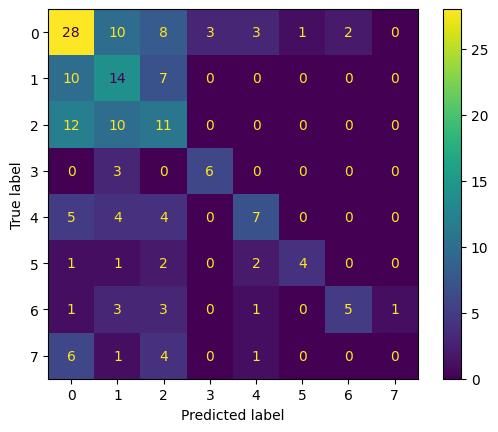

In [ ]:
y_pred = grid_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Compute evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

results_table.add_row(["Neural network", accuracy, precision,recall,f1])

best_classifier = grid_model.best_estimator_

# Predict on the test set using the best model
y_pred = best_classifier.predict(X_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [ ]:
print(results_table)

+----------------+--------------------+-------------------+---------------------+--------------------+
|   Classifier   |      Accuracy      |     Precision     |        Recall       |      F1 Score      |
+----------------+--------------------+-------------------+---------------------+--------------------+
| Neural network | 0.4076086956521739 | 0.463974491691883 | 0.38348083368244656 | 0.4039654215563986 |
+----------------+--------------------+-------------------+---------------------+--------------------+


In [ ]:
#SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear', C=1, gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

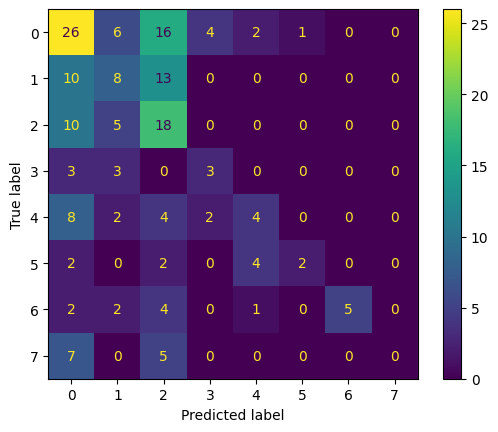

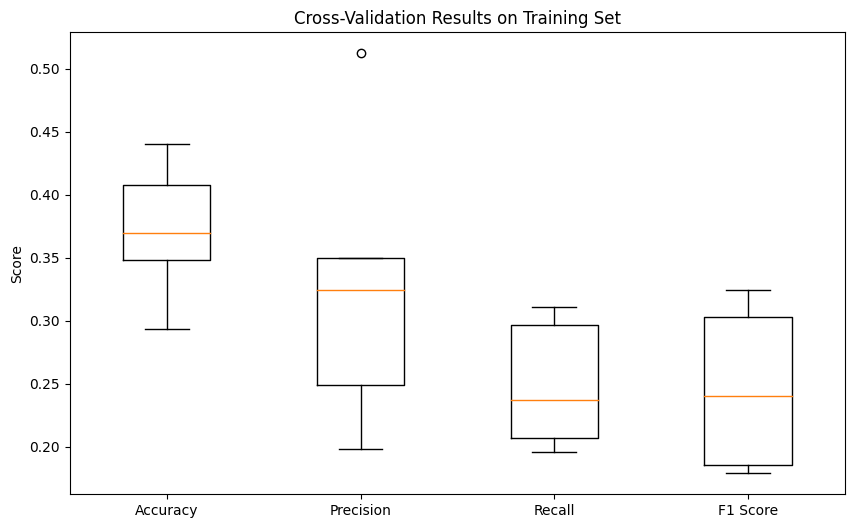

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["SVM with linear", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])

y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
#SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='poly', C=1, gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1, kernel='poly')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

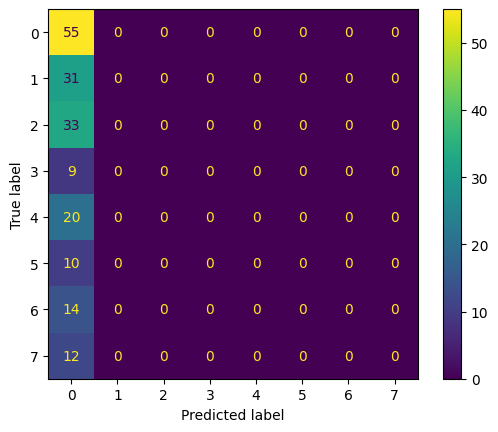

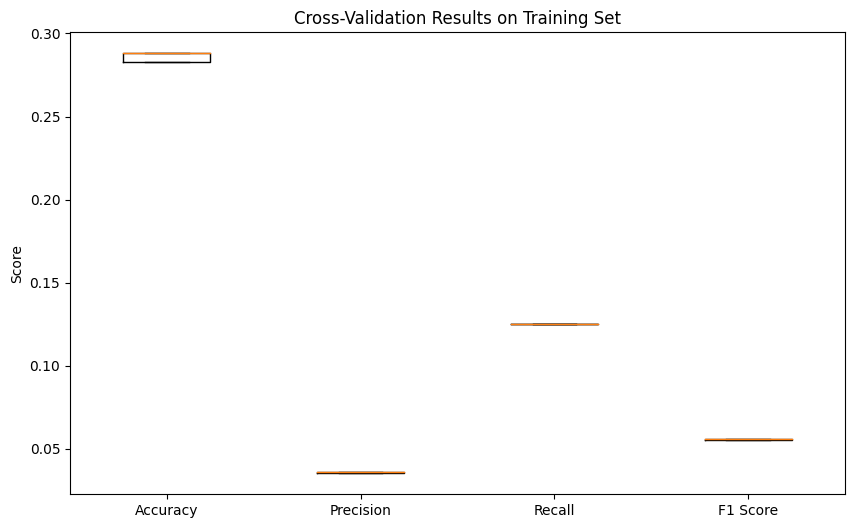

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["SVM with poly", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])
y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
#kNN
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)


KNeighborsClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


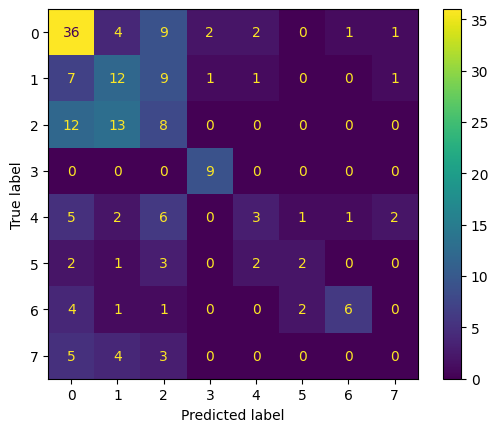

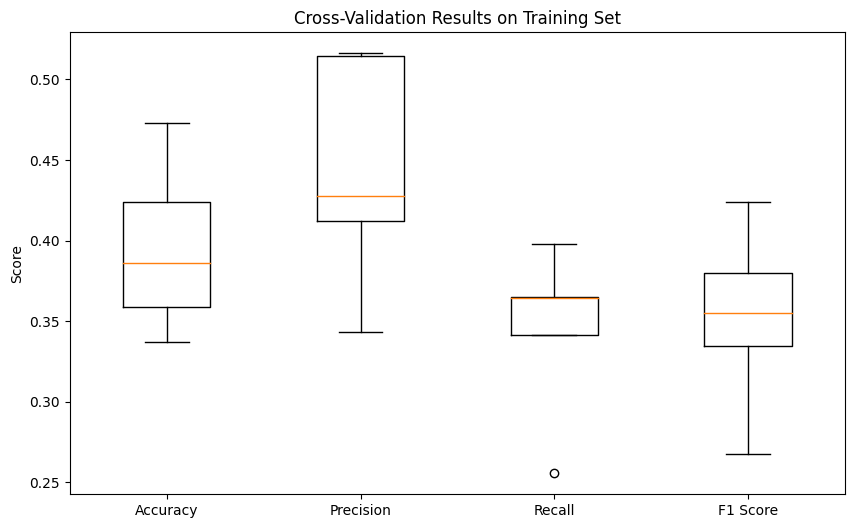

<function accuracy_score at 0x7fde9a6283a0>


In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)


# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["kNN", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])
y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()
print(accuracy_score)

In [ ]:
# Naïve Bayes
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

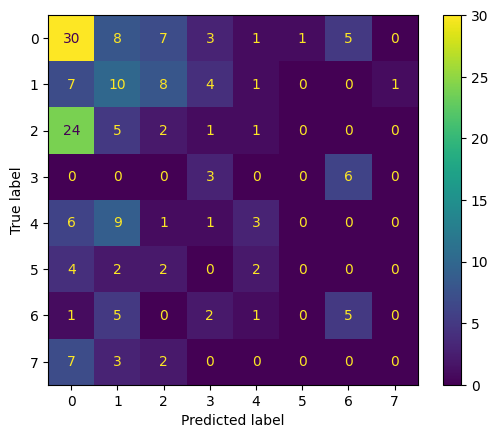

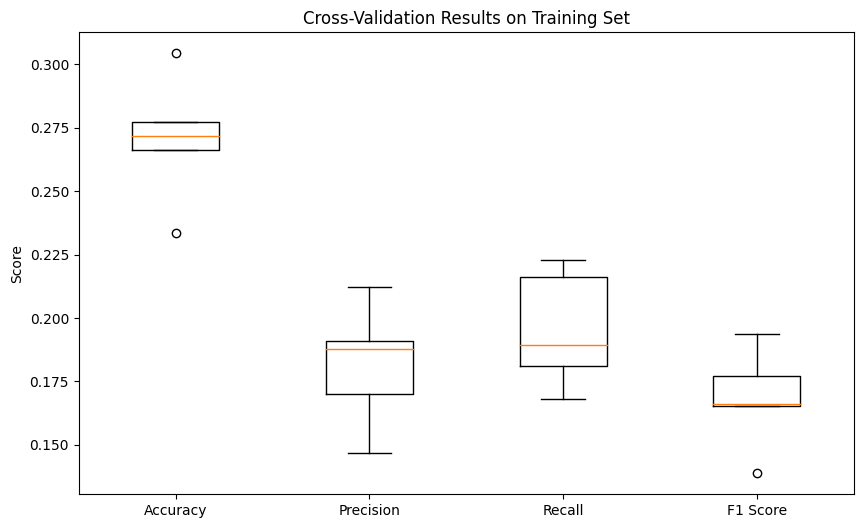

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_val idate(clf, X, y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["Naïve Bayes", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])
y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
#RandomForest
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

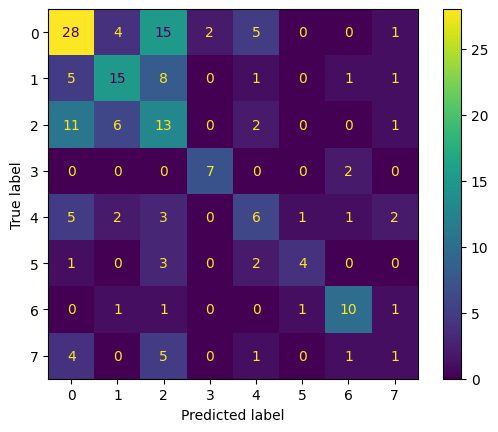

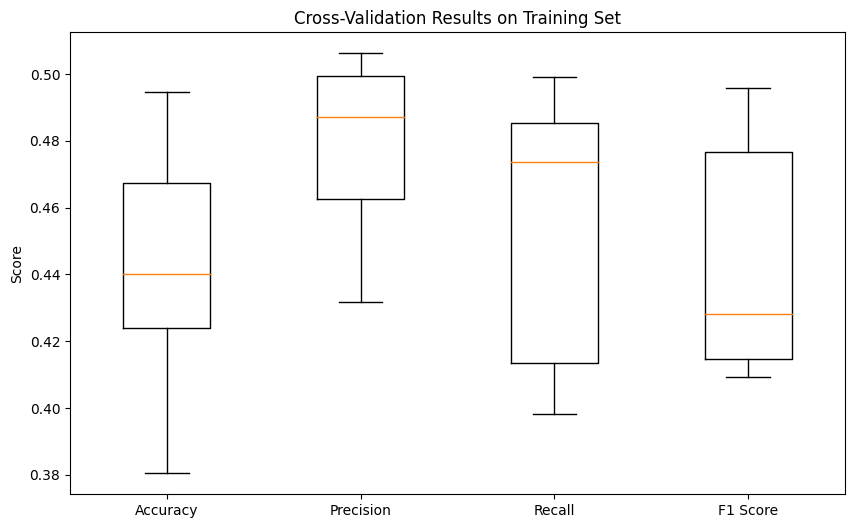

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["RandomForest", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])
y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
# DecisionTree
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

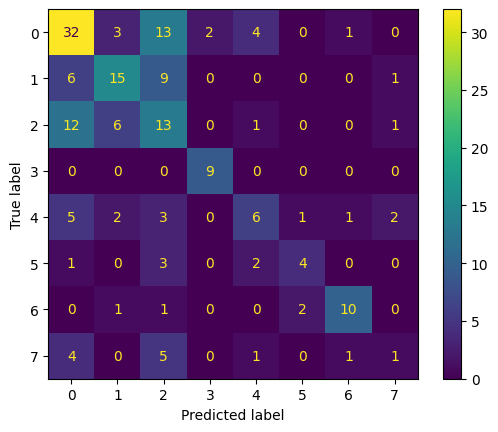

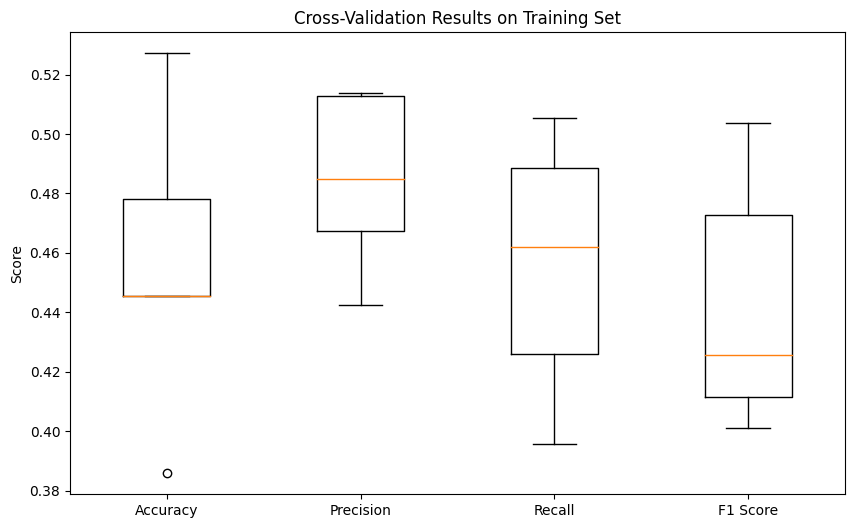

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract the scores for each metric
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision_macro']
recall_scores = cv_results['test_recall_macro']
f1_scores = cv_results['test_f1_macro']

# Create a list of metric scores for each factor
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
results_table.add_row(["DecisionTree", np.mean(accuracy_scores), np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores)])
y_pred = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores)

# Set the y-axis labels
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the title and labels
plt.title('Cross-Validation Results on Training Set')
plt.ylabel('Score')

# Display the plot
plt.show()

In [ ]:
print(results_table)

+-----------------+---------------------+---------------------+---------------------+---------------------+
|    Classifier   |       Accuracy      |      Precision      |        Recall       |       F1 Score      |
+-----------------+---------------------+---------------------+---------------------+---------------------+
|  Neural network |  0.3804347826086957 |  0.4598407732729017 |  0.3571245286971093 |  0.3822689054013333 |
| SVM with linear |  0.3717391304347826 |  0.326809326649761  | 0.24941826844539108 | 0.24640125273412158 |
|  SVM with poly  | 0.28586956521739126 | 0.03573369565217391 |        0.125        |  0.0555782021025531 |
|       kNN       |  0.3956521739130435 |  0.442802505685135  |  0.3447872057188095 |  0.3521942777114603 |
|   Naïve Bayes   | 0.27065217391304347 | 0.18158447288452256 | 0.19555975765586614 |  0.1682376706299357 |
|   RandomForest  |  0.441304347826087  |  0.4774900623221397 |  0.4538966988200479 | 0.44493094701017794 |
|   DecisionTree  | 0.456521

In [ ]:
print(results_table)

+-----------------+--------------------+--------------------+---------------------+---------------------+
|    Classifier   |      Accuracy      |     Precision      |        Recall       |       F1 Score      |
+-----------------+--------------------+--------------------+---------------------+---------------------+
|  Neural network | 0.3804347826086957 | 0.4598407732729017 |  0.3571245286971093 |  0.3822689054013333 |
| SVM with linear | 0.3717391304347826 | 0.326809326649761  | 0.24941826844539108 | 0.24640125273412158 |
+-----------------+--------------------+--------------------+---------------------+---------------------+
